A financial institution is planning to roll out a stock market trading facilitation service for their existing account holders.
This service costs significant amount of money for the bank in terms of infra, licensing and people cost. To make the service 
offering profitable, they charge a percentage base commission on every trade transaction. However this is not a unique service
offered by them,many of their other competitors are offering the same service and at lesser commission some times.
To retain or attract people who trade heavily on stock market and in turn generate a good commission for institution, 
they are planning to offer discounts as they roll out the service to entire customer base.

Problem is , that this discount, hampers profits coming from the customers who do not trade in large quantities . To tackle 
this issue , company wants to offer discounts selectively. To be able to do so, they need to know which of their customers 
are going to be heavy traders or money makers for them To be able to do this, they decided to do a beta run of their service
to a small chunk of their customer base [approx 10000 people]. For these customers they have manually divided them into
two revenue categories 1 and 2. Revenue one category is the one which are money makers for the bank, revenue category 2 are
the ones which need to be kept out of discount offers.

We need to use this study's data to build a prediction model which should be able to identify if a customer is potentially 
eligible for discounts [falls In revenue grid category 1]. Lets get the data and begin.

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np


In [3]:
train_file=r'D:\\Hackathon\\Customer Segment\\rg_train.csv'
test_file=r'D:\\Hackathon\\Customer Segment\\rg_test.csv'

bd_train=pd.read_csv(train_file)
bd_test=pd.read_csv(test_file)

In [4]:
bd_train.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
0,2148,1,45-50,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,...,7.49,2.48,0.0,2,Female,South West,65.87,9.27,30.93,87.48
1,8099,1,61-65,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,...,0.00,3.99,0.0,2,Female,Unknown,42.46,4.49,26.23,110.73
2,6611,3,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.0,2,Male,East Anglia,75.38,0.00,26.66,127.57
3,1950,Zero,55-60,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,2.00,0.00,0.0,2,Female,North West,34.78,6.91,29.24,33.79
4,10857,2,51-55,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,...,0.00,0.00,0.0,2,Female,South West,48.58,9.58,20.65,56.17


In [28]:
bd_train.shape,bd_test.shape

((8124, 33), (2031, 32))

In [17]:
bd_train['data']='train'
bd_test['data']='test'
bd_all=pd.concat([bd_train,bd_test],axis=0)

In [18]:
bd_all.shape

(10155, 33)

In [21]:
# REF_NO,post_code , post_area : drop [ too many unique values]
bd_all.drop(['REF_NO','post_code','post_area'],axis=1,inplace=True)

In [23]:
# children : Zero : 0 , 4+ : 4 and then convert to numeric
bd_all['children'].value_counts()

Zero    6208
1       1848
2       1607
3        473
4+        19
Name: children, dtype: int64

In [24]:
bd_all['children']=np.where(bd_all['children']=='Zero',0,bd_all['children'])
bd_all['children']=np.where(bd_all['children'].str[:1]=='4',4,bd_all['children'])
bd_all['children']=pd.to_numeric(bd_all['children'],errors='coerce')

In [27]:
# Revenue Grid : 1,2 : 1,0 [some functions need the target to be 1/0 in binary classfication]

bd_all['Revenue.Grid'].value_counts(dropna=False)

2.0    7261
NaN    2031
1.0     863
Name: Revenue.Grid, dtype: int64

In [29]:
bd_all['Revenue.Grid']=(bd_all['Revenue.Grid']==1).astype(int)

In [31]:
# age_band, family income : string processing and then to numeric
bd_all['family_income'].value_counts(dropna=False)

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [32]:
bd_all['family_income']=bd_all['family_income'].str.replace(',',"")
bd_all['family_income']=bd_all['family_income'].str.replace('<',"")
k=bd_all['family_income'].str.split('>=',expand=True)

In [33]:
for col in k.columns: 
    k[col]=pd.to_numeric(k[col],errors='coerce')

In [34]:
bd_all['fi']=np.where(bd_all['family_income']=='Unknown',np.nan,
                       np.where(k[0].isnull(),k[1],
                                 np.where(k[1].isnull(),k[0],0.5*(k[0]+k[1]))))

In [119]:
bd_all['ab'].value_counts(dropna=False)

47.50000    1359
38.00000    1134
43.00000    1112
33.00000    1061
53.00000    1052
57.50000    1047
28.00000     927
63.00000     881
67.50000     598
23.50000     456
71.00000     410
19.50000      63
46.46839      55
Name: ab, dtype: int64

In [36]:
k=bd_all['age_band'].str.split('-',expand=True)
for col in k.columns:
    k[col]=pd.to_numeric(k[col],errors='coerce')

In [37]:
bd_all['ab']=np.where(bd_all['age_band'].str[:2]=='71',71,
                      np.where(bd_all['age_band']=='Unknown',np.nan,0.5*(k[0]+k[1])))

In [38]:
del bd_all['age_band']
del bd_all['family_income']

In [39]:
bd_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10155 entries, 0 to 2030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  int64  
 1   status                           10155 non-null  object 
 2   occupation                       10155 non-null  object 
 3   occupation_partner               10155 non-null  object 
 4   home_status                      10155 non-null  object 
 5   self_employed                    10155 non-null  object 
 6   self_employed_partner            10155 non-null  object 
 7   year_last_moved                  10155 non-null  int64  
 8   TVarea                           10155 non-null  object 
 9   Average.Credit.Card.Transaction  10155 non-null  float64
 10  Balance.Transfer                 10155 non-null  float64
 11  Term.Deposit                     10155 non-null  float64
 12  Life.Insurance     

In [45]:
# status , occupation , occupation_partner , home_status,self_employed ,TVArea , Region , gender : dummies

cat_vars=bd_all.select_dtypes(['object']).columns
cat_vars=list(cat_vars)
cat_vars.remove('data')
# we are using pd.get_dummies here to create dummies
# its more straight forward but doesnt let you ignore categories on the basis of frequencies
for col in cat_vars:
    dummy=pd.get_dummies(bd_all[col],drop_first=True,prefix=col)
    bd_all=pd.concat([bd_all,dummy],axis=1)
    del bd_all[col]
    print(col)
    del dummy

status
occupation
occupation_partner
home_status
self_employed
self_employed_partner
TVarea
gender
region


In [117]:
# imputing missing values
for col in bd_all.columns:
     if bd_all[col].isnull().sum()>0:
            bd_all.loc[bd_all[col].isnull(),col]=bd_all.loc[bd_all['data']=='train',col].mean()

In [120]:
# separating data
id_train=bd_all[bd_all['data']=='train']
del id_train['data']
id_test=bd_all[bd_all['data']=='test']
id_test.drop(['Revenue.Grid','data'],axis=1,inplace=True)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2','elasticnet',None],
         # these are L1 and L2 written in lower case
         # dont confuse them with numeric eleven and tweleve
         'C':np.linspace(0.0001,1000,10)
       
       }
# we can certainly try much higher ranges and number of values for the parameter 'C'
# grid search in this case , will be trying out 2*2*10=40 possible combination
# and will give us cross validated performance for all 

In [123]:
model=LogisticRegression(fit_intercept=True,solver='liblinear')

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="roc_auc",n_jobs=-1)
# note that scoring is now roc_auc as we are solving a classification problem
# n_jobs has nothing to do with model building as such
# it enables parallel processing , number reflects number of cores
# of your processor being utilised. -1 , means all the cores

In [126]:
x_train=id_train.drop('Revenue.Grid',axis=1)
y_train=id_train['Revenue.Grid']

In [127]:
id_train.isnull().sum()

children                           0
year_last_moved                    0
Average.Credit.Card.Transaction    0
Balance.Transfer                   0
Term.Deposit                       0
                                  ..
region_South East                  0
region_South West                  0
region_Unknown                     0
region_Wales                       0
region_West Midlands               0
Length: 73, dtype: int64

In [128]:
id_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 73 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   children                              8124 non-null   float64
 1   year_last_moved                       8124 non-null   float64
 2   Average.Credit.Card.Transaction       8124 non-null   float64
 3   Balance.Transfer                      8124 non-null   float64
 4   Term.Deposit                          8124 non-null   float64
 5   Life.Insurance                        8124 non-null   float64
 6   Medical.Insurance                     8124 non-null   float64
 7   Average.A.C.Balance                   8124 non-null   float64
 8   Personal.Loan                         8124 non-null   float64
 9   Investment.in.Mutual.Fund             8124 non-null   float64
 10  Investment.Tax.Saving.Bond            8124 non-null   float64
 11  Home.Loan        

In [129]:
id_train['status_Partner'].value_counts(dropna=False)

1    6171
0    1953
Name: status_Partner, dtype: int64

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.000000e-04, 1.111112e+02, 2.222223e+02, 3.333334e+02,
       4.444445e+02, 5.555556e+02, 6.666667e+02, 7.777778e+02,
       8.888889e+02, 1.000000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='roc_auc')

In [132]:
grid_search.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', solver='liblinear')

In [133]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [134]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.954608 (std: 0.012640)
Parameters: {'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.952582 (std: 0.013094)
Parameters: {'C': 333.3334, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.952572 (std: 0.013020)
Parameters: {'C': 222.22230000000002, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.952320 (std: 0.012809)
Parameters: {'C': 555.5556, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.952289 (std: 0.012614)
Parameters: {'C': 666.6667, 'class_weight': 'balanced', 'penalty': 'l2'}



In [136]:
logr=LogisticRegression(fit_intercept=True,
                        **{'C': 0.0001, 'class_weight': 'balanced', 'penalty': 'l2'},solver='liblinear')

In [137]:
logr.fit(x_train,y_train)

LogisticRegression(C=0.0001, class_weight='balanced', solver='liblinear')

In [142]:
# predict_proba for predciting probabilities
# just predict, predicts hard classes consid1 cutoffs = np.linspace(.001,0.999, 999)ering 0.5 as score cutoff
# which is not always a great idea, we'll see in a moment
# how to determine our own cutoff, in case we need to predict hard classes
test_prediction = grid_search.predict_proba(id_test)

In [148]:
logr.predict_proba(x_train)

array([[0.98874774, 0.01125226],
       [0.85761617, 0.14238383],
       [0.94348114, 0.05651886],
       ...,
       [0.45934326, 0.54065674],
       [0.9332651 , 0.0667349 ],
       [0.97774871, 0.02225129]])

In [149]:
train_score=logr.predict_proba(x_train)[:,1]

In [150]:
real = y_train

In [151]:
cutoffs = np.linspace(.001,0.999, 999)

In [153]:
KS=[]
for cutoff in cutoffs:
    predicted=(train_score>cutoff).astype(int)
    TP=((real==1)&(predicted==1)).sum()
    FP=((real==0)&(predicted==1)).sum()
    TN=((real==0)&(predicted==0)).sum()
    FN=((real==1)&(predicted==0)).sum()
    ks=(TP/(TP+FN))-(FP/(TN+FP))
    KS.append(ks)

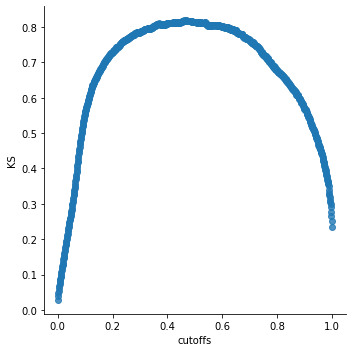

In [154]:
import seaborn as sns
    
temp=pd.DataFrame({'cutoffs':cutoffs,'KS':KS})
sns.lmplot(x='cutoffs',y='KS',data=temp,fit_reg=False)

In [172]:
cutoffs[KS==max(KS)][0],max(KS)

(0.467, 0.8190059019415621)

In [171]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_train
    df['proba'] = train_score
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

In [165]:
evaluate_ks_and_roc_auc(y_train, train_score)

KS: 0.8191 (p-value: 1.110e-16)
ROC AUC: 0.9565


(0.819143624018411, 0.9564571626092381)